# Face detection using Single Shot Detection (SSD) and the ResNet model

In this recipe, you will learn how to detect faces using a convolution neural network model. The ability to accurately detect faces in different conditions is used in various computer vision applications, such as face enhancement.

We use the Single Shot Detection approach with the ResNet-10 model. Pay attention to specifying mean color when feeding the input frame.

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2,start_3=0, end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S05\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s05\env

d:\html_doc\program\opencv\packt\s05\env\lib\site-packages
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S05\env


In [2]:
model = cv2.dnn.readNetFromCaffe('../data/face_detector/deploy.prototxt', 
                                 '../data/face_detector/res10_300x300_ssd_iter_140000.caffemodel')
CONF_THR = 0.5

In [3]:
capture = cv2.VideoCapture('../data/faces.mp4')

print(capture.isOpened())
print('Created capture:', '../data/shuttle.mp4')
print('Frame count:', int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
print('Frame width:', int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Frame height:', int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('Frame rate:', capture.get(cv2.CAP_PROP_FPS))
# capture.get(CV_CAP_PROP_POS_FRAMES); // retrieves the current frame number

image_frames = []

c = 0
while True:
    ret, frame = capture.read()
    if not ret: 
        break
    
    
    h, w = frame.shape[0:2]
    blob = cv2.dnn.blobFromImage(frame, 1, (300*w//h,300), (104,177,123), False)
    model.setInput(blob)
    output = model.forward()
    
    for i in range(output.shape[2]):
        conf = output[0,0,i,2]
        if conf > CONF_THR:
            label = output[0,0,i,1]
            x0,y0,x1,y1 = (output[0,0,i,3:7] * [w,h,w,h]).astype(int)
            cv2.rectangle(frame, (x0,y0), (x1,y1), (0,255,0), 2)
            cv2.putText(frame, 'conf: {:.2f}'.format(conf), (x0,y0),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    
    c += 1
    
    if c % 60 == 0 or c ==1:
        image_frames.append(["frame:{0}".format(c),frame[:,:,[2,1,0]]])
        #print("current frame ==",current_frame, output.shape)

    if c == 60:
        cv2.imwrite('ch5_face_detections.png', frame)
    
    cv2.imshow('frame', frame)
    key = cv2.waitKey(3)
    if key == 27: 
        break
        
cv2.destroyAllWindows()

True
Created capture: ../data/shuttle.mp4
Frame count: 721
Frame width: 1280
Frame height: 720
Frame rate: 23.976023976023978


len(res10_300x300_ssd_iter_140000) == 13


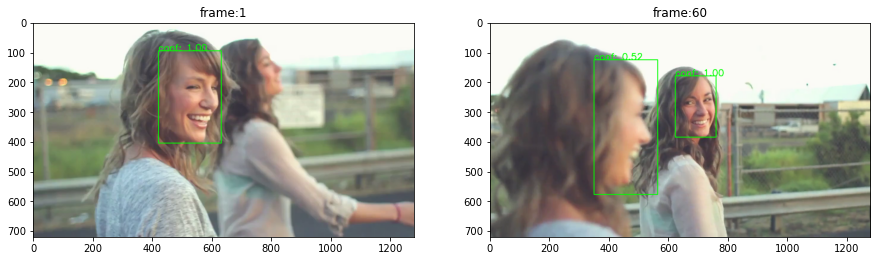

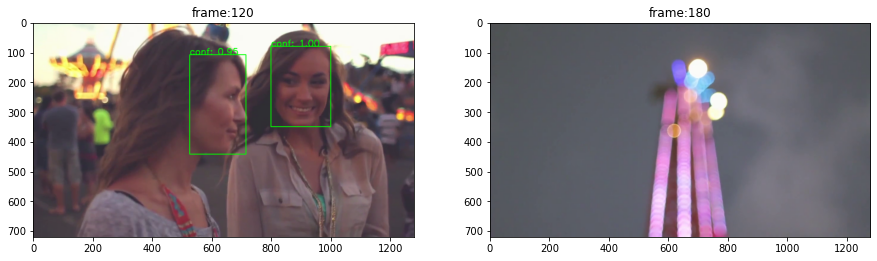

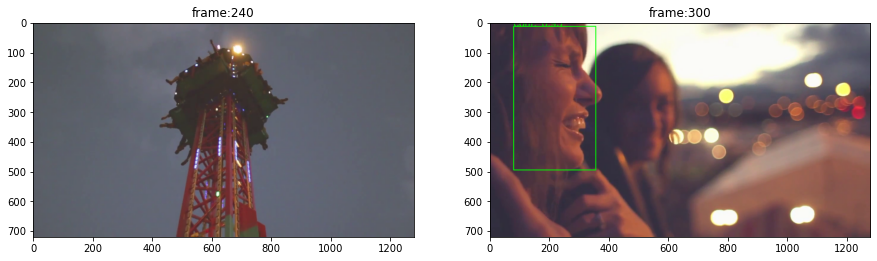

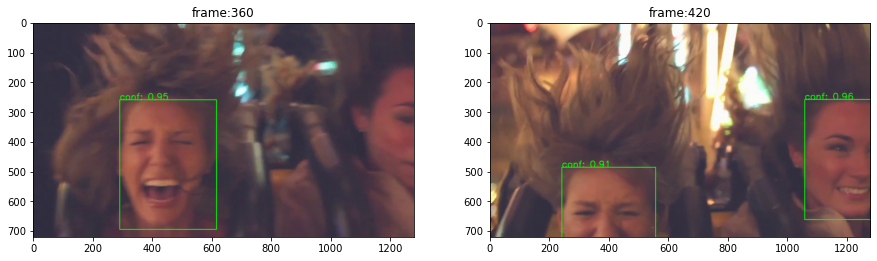

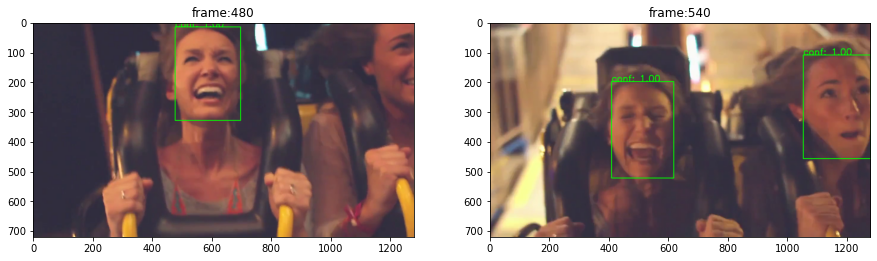

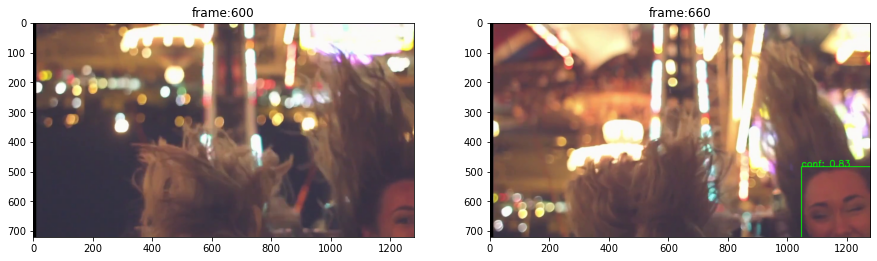

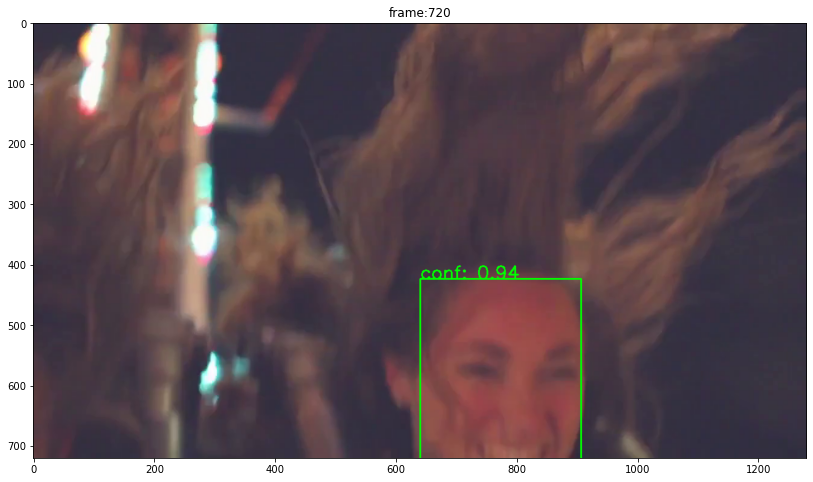

In [4]:
#########################################################
print("len(res10_300x300_ssd_iter_140000) ==", len(image_frames))
k =2
for i in range(0,len(image_frames),k):
    plt_view_image(plt,image_frames[i:i+k], figsize=(15,8), axis='on', cmap='gray')